## Regularization
- 규제는 과도 학습을 방지하도록 유도
  - 즉, 특성에 곱해지는 계수의 크기를 작게 만드는 것
  - 최적의 규제 강도를 설정
    - 과대적합(Overfitting), 과소적합(Underfitting) 방지
- 특성 공학(Feature Engineering)
  - 각 특성을 서로 곱해 새로운 특성을 생성 가능

### Practice
- Using **`pandas`** library
- Read URL of CSV file
- Using sklearn **`PolynomialFeatures()`**
- Using **`train_test_split()`**
- Import **`sklearn.preprocessing`**
- Why is element **`1`** added as a feature?
- Using **`include_bias=""`**
- Using **`get_feature_names_out()`**
- Why transformation a test-set to a transformer applied to a train-set?
- Train multiple regression models using transformed features
- Ridge Regression and Lasso Regression
- Visualize performance on reqularization strength
- Using **`np.log10()`**

### 1. Prepare to numerical data
- 다중 선형 회귀 모델 표현을 위한 데이터 준비

### 1-1. Import Pandas library

In [ ]:
import pandas as pd #Pandas shortcut
df = pd.read_csv("https://bit.ly/perch_csv_data")
perch_full = df.to_numpy()

#Checkout
print("length, height, width")
print(perch_full)

length, height, width
[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.4

### 1-2. Import numpy

In [ ]:
import numpy as np

In [ ]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

### 1-3. Create Train-set and Test-set to using **`train_test_split()`**
- perch_full(length, height, width) & perch_weight 데이터의 Train-set, Test-set

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

### 2. Create new feature
- Import sklearn.preprocessing
- Import PolynomialFeatures()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

### 2-1. **`fit()`** and **`transform()`** of the polynomial class
- **`fit()`**
  - 새로운 생성할 특성의 조합을 지정
- **`transform()`**
  - 실제 데이터를 변환하는 과정, Target 데이터가 필요하지 않음

In [ ]:
#example
poly = PolynomialFeatures()
poly.fit([[2, 3]]) #2와 3으로 이루어진 두 가지의 특성(원소)
print(poly.transform([[2, 3]])) #2, 3, 2^2(4), 3^2(9), 두 특성의 곱 = 2*3(6) 반환, 그런데 왜 1이 추가되었나?

[[1. 2. 3. 4. 6. 9.]]


### 2-2. Why is element **`1`** added as a feature?
- 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있음
- 기본적으로 (특성, 특성, 특성, 1) 형식처럼 자동으로 절편이 추가되기 때문
- Solution
  - **include_bias=False`** 지정

In [ ]:
#example
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]]) #2와 3으로 이루어진 두 가지의 특성(원소)
print(poly.transform([[2, 3]])) #2, 3, 2^2(4), 3^2(9), 두 특성의 곱 = 2*3(6) 반환

[[2. 3. 4. 6. 9.]]


### 2-3. Transformation a train_input
- 해당 방법을 train_input 데이터에 적용

In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

#Checkout
print(train_poly.shape) #(_dataNumber, _featureNumber)반환
print(train_poly[:10])

(42, 9)
[[  19.6       5.14      3.04    384.16    100.744    59.584    26.4196
    15.6256    9.2416]
 [  22.        5.88      3.52    484.      129.36     77.44     34.5744
    20.6976   12.3904]
 [  18.7       5.2       3.12    349.69     97.24     58.344    27.04
    16.224     9.7344]
 [  17.4       4.59      2.94    302.76     79.866    51.156    21.0681
    13.4946    8.6436]
 [  36.       10.61      6.74   1296.      381.96    242.64    112.5721
    71.5114   45.4276]
 [  25.        6.44      3.68    625.      161.       92.       41.4736
    23.6992   13.5424]
 [  40.       11.93      7.11   1600.      477.2     284.4     142.3249
    84.8223   50.5521]
 [  39.       12.43      7.35   1521.      484.77    286.65    154.5049
    91.3605   54.0225]
 [  43.       11.93      7.28   1849.      512.99    313.04    142.3249
    86.8504   52.9984]
 [  22.        5.64      3.52    484.      124.08     77.44     31.8096
    19.8528   12.3904]]


### 2-4 Using **`get_feature_names_out()`**
- **`get_feature_names_out()`**: 각 특성이 어떤 조합으로 생성되었는지 확인 가능

In [ ]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

2-5. Transformation a test_input
- 해당 방법을 test_input 데이터에 적용 

In [ ]:
test_poly = poly.transform(test_input)

#Checkout
print(test_poly.shape) #(_dataNumber, _featureNumber)반환
print(test_poly)

(14, 9)
[[8.400000e+00 2.110000e+00 1.410000e+00 7.056000e+01 1.772400e+01
  1.184400e+01 4.452100e+00 2.975100e+00 1.988100e+00]
 [1.800000e+01 5.220000e+00 3.320000e+00 3.240000e+02 9.396000e+01
  5.976000e+01 2.724840e+01 1.733040e+01 1.102240e+01]
 [2.750000e+01 7.280000e+00 4.570000e+00 7.562500e+02 2.002000e+02
  1.256750e+02 5.299840e+01 3.326960e+01 2.088490e+01]
 [2.130000e+01 6.380000e+00 3.530000e+00 4.536900e+02 1.358940e+02
  7.518900e+01 4.070440e+01 2.252140e+01 1.246090e+01]
 [2.250000e+01 5.860000e+00 3.620000e+00 5.062500e+02 1.318500e+02
  8.145000e+01 3.433960e+01 2.121320e+01 1.310440e+01]
 [4.000000e+01 1.114000e+01 6.630000e+00 1.600000e+03 4.456000e+02
  2.652000e+02 1.240996e+02 7.385820e+01 4.395690e+01]
 [3.000000e+01 7.620000e+00 4.770000e+00 9.000000e+02 2.286000e+02
  1.431000e+02 5.806440e+01 3.634740e+01 2.275290e+01]
 [2.460000e+01 6.730000e+00 4.170000e+00 6.051600e+02 1.655580e+02
  1.025820e+02 4.529290e+01 2.806410e+01 1.738890e+01]
 [3.900000e+01 1

### 2-6. Why transformation a test-set to a transformer applied to a train-set?
- 항상 훈련 세트를 기준으로 테스트 세트를 변환하는 것이 좋다
- 약속된 방식은 아니므로, 테스트 세트를 따로 변환하는 것이 가능하긴 하다 

### 3. Train multiple regression models using transformed features
- Import LinearRegression
- Start to fit
  - train_poly
  - train_target

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [ ]:
#Checkout train
print(lr.score(train_poly, train_target))

#Checkout test
print(lr.score(test_poly, test_target)) #과소적합 문제 해결

0.9903183436982124
0.9714559911594134


### 4. Regularization
- **`degree`**: 고차항의 최대 차수를 지정 가능(default='2')
  - 값이 높아질 수록 3제곱, 4, 5..제곱항을 추가하는 것이 가능
  - 단, 훈련 세트의 샘플 개수보다 특성 개수가 초과되는 경우
    - 100/100에 가까운 정확도 평가 또는 음수가 반환
    - 과대적합 모델이 발생하므로 적절한 규제가 필요
- 규제는 과도 학습을 방지하도록 유도
  - 즉, 특성에 곱해지는 계수의 크기를 작게 만드는 것


### 4-1. Using **`StandardScaler`** from **`sklearn.preprocessing`**
- 정규화를 통해 반환한 표준점수로 특성의 크기를 규제하기 위해 사용
- StandardScaler 객체 ss 생성 및 초기화
- PolynomialFeatures 클래스로 생성한 train_poly로 ss 객체 훈련
- 테스트 세트의 표준점수 변환

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
#Checkout
print(ss.mean_) #훈련 세트에서 학습한 평균(mean_)
print(ss.scale_) #훈련 세트에서 학습한 표준편차(scale_)

[ 28.4452381    8.04238095   4.82047619 885.315      253.48688095
 151.959       72.9365      43.69994524  26.2868381 ]
[  8.72831196   2.87343151   1.74638123 524.78298827 160.83642815
  96.47937892  49.51657488  29.75789558  18.11394122]


### 4-2. Ridge Regression and Lasso Regression
- from **`sklearn.linear_model`**
- ridge: 계수를 제곱한 값을 기준으로 규제 적용
  - 일반적으로 사용, 0에 가까워지지만 0이 될 수는 없음
  - 변수 선택 불가능
  - 크기가 큰 것부터 우선적으로 줄임
- lasso: 계수의 절댓값을 기준으로 규제 적용
  - 계수를 0까지 줄일 수 있음
  - 중요하지 않은 것부터 줄이거나 아예 제외할 수 있음

### 4-3. Ridge
- L2 Regression


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)

#Check score
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9857915060511934
0.9835057194929057


### 4-4. Lasso
- L1 Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)

#Check score
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.986591255464559
0.9846056618190413


### 5. Visualize performance on reqularization strength
- import **`matplotlib.pyplot`**
- HyperParameter
  - 모델이 자동으로 학습하지 않는 파라미터
  - 사용자가 직접 지정해야하는 파라미터
  - ${\alpha}$: 규제의 강도를 조절(적절한 범위를 지정해야함)
    - ${\alpha}$ 값의 증가는 과소적합의 발생을 유도
    - ${\alpha}$ 값의 감소는 과대적합의 발생을 유도, 규제의 필요성이 없어짐

### 5-1. Visualize performance of L2 Regression
- 훈련 세트와 테스트 세트의 결정 계수가 가장 가까운 지점 확인
- 최적의 alpha 값 분석 가능

In [ ]:
import matplotlib.pyplot as plt

#Save score list
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] #hyper parameter

for alpha in alpha_list:
  #L2모델 생성
  ridge = Ridge(alpha=alpha)
  #훈련
  ridge.fit(train_scaled, train_target)
  # 점수 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

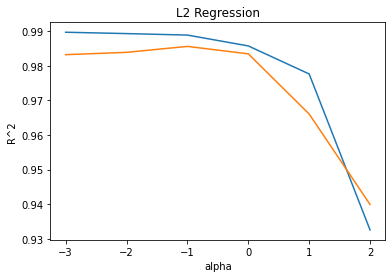

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.title("L2 Regression")
plt.show()

### 5-2. Setting the reqularization strength
- 모델 일반화 가능
- 최적의 하이퍼파라미터를 통해 과대적합과 과소적합 사이의 균형을 유지

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

#Check score
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9889354346720892
0.9856564835209134


>  

### 5-3. Visualize performance of L1 Regression
- 훈련 세트와 테스트 세트의 결정 계수가 가장 가까운 지점 확인
- 최적의 alpha 값 분석 가능
- **`max_iter=`**
  - lasso 회귀는 최적의 계수를 찾기 위해 반복 계산을 수행
  - ConvergeWarning: 지정 반복 횟수가 부족하면 출력(특별한 영향 없음)

In [ ]:
#Save score list
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] #hyper parameter

for alpha in alpha_list:
  #L1모델 생성
  lasso = Lasso(alpha=alpha, max_iter=10000)
  #훈련
  lasso.fit(train_scaled, train_target)
  # 점수 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.739e+03, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


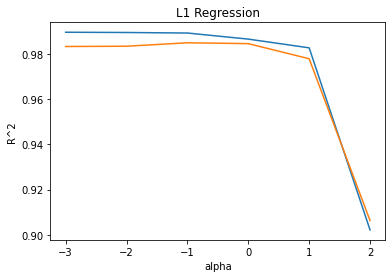

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.title("L1 Regression")
plt.show()

### 5-4. Setting the reqularization strength
- 모델 일반화 가능
- 최적의 하이퍼파라미터를 통해 과대적합과 과소적합 사이의 균형을 유지

In [ ]:
lasso = Lasso(alpha=1)
lasso.fit(train_scaled, train_target)

#Check score
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.986591255464559
0.9846056618190413
